

#*KNN*

In [1]:
#importing pandas, numpy and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing the required file to proceed
train=pd.read_csv('/content/drive/MyDrive/classification_train.csv')
print(train.shape)

#creating a 2D array
x_train = train.loc[:19999,:]
x_train=np.array(x_train)
m,n=x_train.shape
print(x_train.shape)

x_test = train.loc[20000:,:]
x_test=np.array(x_test)
M,N=x_test.shape
print(x_test.shape)

(30000, 786)
(20000, 786)
(10000, 786)


In [3]:
y_train=x_train[:,1]
y_train=y_train.reshape(m,1)
y_test=x_test[:,1]
y_test=y_test.reshape(M,1)

In [4]:
#deleting unwanted columns
x_train=np.delete(x_train,0,axis=1)
x_train=np.delete(x_train,0,axis=1)
x_test=np.delete(x_test,0,axis=1)
x_test=np.delete(x_test,0,axis=1)
print(x_test.shape)
print(x_train.shape)

(10000, 784)
(20000, 784)


In [5]:
#to cal the distance
def dis(x_m,x_t,i):
  d=np.zeros((m,1))
  d=np.sum((x_m-x_t[i])**2,axis=1)
  d=np.sqrt(d)
  d=d.reshape(m,1)
  return d

In [6]:
def prediction(x_m,x_t,y,k,n):
  predict=np.zeros(n)
  for i in range(n):
    #dis is calculated
    d=dis(x_m,x_t,i)
    #dis with its corresponding y is being added
    A=np.c_[y,d]
    #A is sorted on the basis of dis
    A=A[A[:,1].argsort()]
    A=np.int_(A) #all numbers converted to int

    ''' Only first k shortest dis are taken'''
    X=np.array(A[:k,:])
    '''To take the number that appeared max no of times'''
    predict[i]=np.bincount(X[:,0]).argmax()

    if i%100==0:
      print("no of examples tested out",i)

  return predict

#k from 30 to 100 for best
k=int(input(" Put the value of k "))

#nex should be between 1 to 10,000
nex=int(input("No of examples you want to verify to check accuracy : "))

yf=prediction(x_train,x_test,y_train,k,nex)
yf=yf.reshape(-1,1)


 Put the value of k 10
No of examples you want to verify to check accuracy : 1000
no of examples tested out 0
no of examples tested out 100
no of examples tested out 200
no of examples tested out 300
no of examples tested out 400
no of examples tested out 500
no of examples tested out 600
no of examples tested out 700
no of examples tested out 800
no of examples tested out 900


In [7]:
c=0
for j in range(nex):
  if yf[j]==y_test[j]:
    c+=1
print("Accuracy : ", 100*c/nex)


Accuracy :  82.4


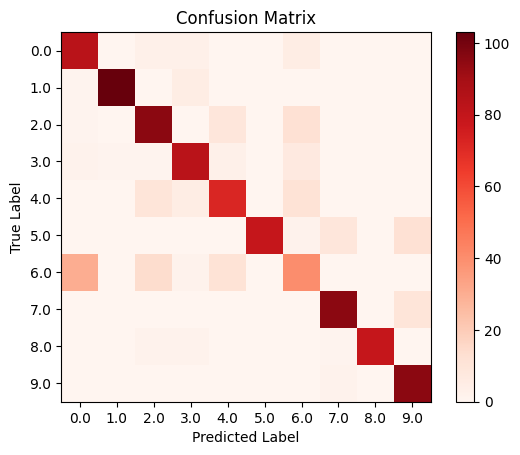

In [8]:
from sklearn.metrics import confusion_matrix
y_test=y_test.reshape(10000,)
yf=yf.reshape(nex,1)
y=y_test[:nex]
# Assuming you have two sets of labels
predicted_labels = np.array(y)
true_labels = np.array(yf)

# Calculate confusion matrix
cm = confusion_matrix(y_test[:1000], yf[:1000])

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(true_labels)))
plt.xticks(tick_marks, np.unique(true_labels))
plt.yticks(tick_marks, np.unique(true_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show plot
plt.show()
